In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [50]:
train = pd.read_csv('pipelined_train.csv')
#test = pd.read_csv("pipelined_test.csv")
train.head()

,Unnamed: 0,first_active_month,card_id,feature_3,target,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,...,authorized_flag_sum,authorized_flag_mean,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3
0,0,6/1/17,C_ID_92a2005557,1,-0.820283,245,13.0,0.0,0.000000,1.000000,...,247,0.950000,0,0,0,0,1,0,1,0
1,1,1/1/17,C_ID_3d0044924f,0,0.392913,396,11.0,2.0,0.181818,0.818182,...,339,0.968571,0,0,0,1,0,1,0,0
2,2,8/1/16,C_ID_d639edf6cd,0,0.688056,549,2.0,0.0,0.000000,0.000000,...,41,0.953488,0,1,0,0,0,0,1,0
3,3,9/1/17,C_ID_186d6a6901,0,0.142495,153,NaN,NaN,NaN,NaN,...,77,1.000000,0,0,0,1,0,0,0,1
4,4,11/1/17,C_ID_cdbd2c0db2,0,-0.159749,92,5.0,3.0,0.600000,0.000000,...,128,0.962406,1,0,0,0,0,0,0,1


In [51]:
train_c = train.dropna()
train_c

,Unnamed: 0,first_active_month,card_id,feature_3,target,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,...,authorized_flag_sum,authorized_flag_mean,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3
0,0,6/1/17,C_ID_92a2005557,1,-0.820283,245,13.0,0.0,0.000000,1.000000,...,247,0.950000,0,0,0,0,1,0,1,0
1,1,1/1/17,C_ID_3d0044924f,0,0.392913,396,11.0,2.0,0.181818,0.818182,...,339,0.968571,0,0,0,1,0,1,0,0
4,4,11/1/17,C_ID_cdbd2c0db2,0,-0.159749,92,5.0,3.0,0.600000,0.000000,...,128,0.962406,1,0,0,0,0,0,0,1
6,6,12/1/16,C_ID_7e63323c00,1,0.230129,427,17.0,0.0,0.000000,0.000000,...,243,0.934615,0,0,1,0,0,0,1,0
9,9,8/1/16,C_ID_bf62c0b49d,0,0.300062,549,14.0,0.0,0.000000,1.000000,...,99,0.876106,0,1,0,0,0,0,1,0
14,14,8/1/17,C_ID_b6302b31c6,1,1.597750,184,7.0,0.0,0.000000,0.428571,...,58,0.892308,0,0,1,0,0,0,1,0
16,16,7/1/16,C_ID_9feec11e78,0,1.132236,580,33.0,17.0,0.515152,0.090909,...,82,0.713043,0,1,0,0,0,0,1,0
20,20,9/1/17,C_ID_0b70ca7347,1,1.442726,153,15.0,0.0,0.000000,0.866667,...,165,0.916667,0,0,0,0,1,0,1,0
23,23,10/1/17,C_ID_e03db05bde,0,-0.529658,123,9.0,0.0,0.000000,0.000000,...,123,0.931818,0,1,0,0,0,0,1,0
24,24,10/1/15,C_ID_dcb7c76747,1,-0.084951,854,12.0,0.0,0.000000,1.000000,...,154,0.927711,0,0,0,0,1,1,0,0


In [52]:
#data.dtypes
headers = train_c.dtypes.index
headers

Index(['Unnamed: 0', 'first_active_month', 'card_id', 'feature_3', 'target',
       'elapsed_time', 'hist_transactions_count', 'hist_category_1_sum',
       'hist_category_1_mean', 'hist_category_2_1.0_mean',
       ...
       'authorized_flag_sum', 'authorized_flag_mean', 'feature_1_1',
       'feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5',
       'feature_2_1', 'feature_2_2', 'feature_2_3'],
      dtype='object', length=147)

In [53]:
#list(data.columns.values)
list(train_c)

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_3',
 'target',
 'elapsed_time',
 'hist_transactions_count',
 'hist_category_1_sum',
 'hist_category_1_mean',
 'hist_category_2_1.0_mean',
 'hist_category_2_2.0_mean',
 'hist_category_2_3.0_mean',
 'hist_category_2_4.0_mean',
 'hist_category_2_5.0_mean',
 'hist_category_3_A_mean',
 'hist_category_3_B_mean',
 'hist_category_3_C_mean',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_state_id_nunique',
 'hist_city_id_nunique',
 'hist_subsector_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_std',
 'hist_installments_sum',
 'hist_installments_mean',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_std',
 'hist_purchase_month_mean',
 'hist_purchase_month_max',
 'hist_purchase_month_min',
 'hist_purchase_month_std',
 'hist_purchase_date_ptp',
 'hist_purchase_date_min',
 'hist_purcha

In [59]:
#X = train_c[[ "feature_1_2", "feature_1_3","feature_1_4", "feature_1_5", "feature_2_2", "feature_2_3", "feature_3", 
             #"hist_transactions_count", "hist_category_1_mean", "hist_category_2_2.0_mean", "hist_category_2_3.0_mean",
             #"hist_category_2_4.0_mean", "hist_category_2_5.0_mean", "hist_category_3_B_mean", 
             #"hist_category_3_C_mean","hist_purchase_amount_mean","hist_installments_mean", "hist_purchase_month_mean","hist_purchase_date_ptp", "auth_transactions_count"]]
#y = train_c["target"].values.reshape(-1, 1)
#print(X.shape, y.shape)

In [63]:
#Create a new dataframe 
train_c_1 = train_c[['feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5', 'feature_2_2', 'feature_2_3', 'feature_3', 'hist_transactions_count', 'hist_category_1_mean', 'hist_category_2_2.0_mean', 'hist_category_2_3.0_mean', 'hist_category_2_4.0_mean', 'hist_category_2_5.0_mean', 'hist_category_3_B_mean', 'hist_category_3_C_mean', 'hist_purchase_amount_mean', 'hist_installments_mean', 'hist_purchase_month_mean', 'hist_purchase_date_ptp', 'auth_transactions_count']]

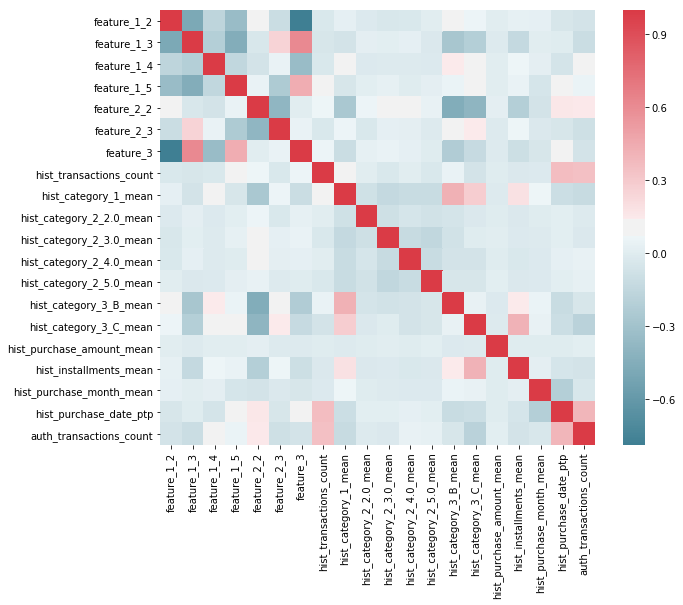

In [66]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train_c_1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [54]:
y = train_c["target"]
X = train_c
del X["target"]
del X["card_id"]
del X["first_active_month"]
del X["feature_1_1"]
del X["feature_2_1"]

In [ ]:
X = train_c[["feature_1_1", "feature_1_2", "feature_1_3","feature_1_4", "feature_1_5", "feature_2_1", "feature_2_2", "feature_2_3", "feature_3", 
             "hist_transactions_count","hist_purchase_amount_mean","hist_installments_mean"]]
y = train_c["target"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 12.814029117590579
R-squared (R2 ): 0.05160033679685694


In [58]:
model.score(X_test, y_test)

0.05160033679685694

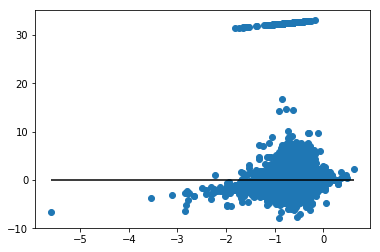

In [38]:
#predictions = model.predict(X_test)
# Plot Residuals
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

,Unnamed: 0,feature_3,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,hist_category_2_4.0_mean,...,installments_std_mean,installments_std_std,authorized_flag_sum,authorized_flag_mean,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_2,feature_2_3
Unnamed: 0,1.000000,0.005710,0.007901,0.008556,-0.001791,-0.008072,0.002151,0.000823,0.004720,-0.006362,...,0.002226,0.002540,0.004045,-0.004662,-0.002408,0.002030,-0.006148,0.004152,0.004387,-0.002588
feature_3,0.005710,1.000000,0.136924,0.059163,-0.046214,-0.106496,0.008213,0.030242,0.045343,0.024486,...,-0.024293,-0.020209,-0.061582,-0.066972,-0.787121,0.611123,-0.343470,0.436729,0.002263,0.046783
elapsed_time,0.007901,0.136924,1.000000,0.111810,0.016670,-0.067240,0.036588,0.007601,0.000681,0.003528,...,-0.008500,-0.003107,0.147536,0.077572,-0.074819,0.063657,-0.073917,0.082552,-0.067935,0.145694
hist_transactions_count,0.008556,0.059163,0.111810,1.000000,0.582835,0.141262,-0.054451,0.008591,-0.027931,0.007916,...,0.002904,0.005493,0.344403,-0.294432,-0.028799,-0.041064,-0.029053,0.113600,0.065748,-0.032102
hist_category_1_sum,-0.001791,-0.046214,0.016670,0.582835,1.000000,0.612861,-0.207417,-0.045192,-0.083824,-0.067691,...,0.015323,0.011695,-0.025380,-0.358626,0.016287,-0.041862,0.036500,-0.004704,-0.155850,0.045669
hist_category_1_mean,-0.008072,-0.106496,-0.067240,0.141262,0.612861,1.000000,-0.335201,-0.079125,-0.135206,-0.115336,...,0.027687,0.019004,-0.119346,-0.272983,0.027353,-0.067583,0.077418,-0.043668,-0.262634,0.061287
hist_category_2_1.0_mean,0.002151,0.008213,0.036588,-0.054451,-0.207417,-0.335201,1.000000,-0.217859,-0.403836,-0.307943,...,-0.010565,-0.006427,0.051736,0.109107,0.027538,0.017549,-0.021064,-0.010653,-0.007449,-0.055367
hist_category_2_2.0_mean,0.000823,0.030242,0.007601,0.008591,-0.045192,-0.079125,-0.217859,1.000000,-0.084746,-0.052611,...,-0.005603,-0.003967,-0.010709,-0.009422,-0.013957,0.019683,-0.016881,0.011843,0.057685,-0.026761
hist_category_2_3.0_mean,0.004720,0.045343,0.000681,-0.027931,-0.083824,-0.135206,-0.403836,-0.084746,1.000000,-0.119522,...,0.003020,0.001101,-0.023383,0.000031,-0.033226,0.015387,-0.012128,0.033808,0.075145,0.025599
hist_category_2_4.0_mean,-0.006362,0.024486,0.003528,0.007916,-0.067691,-0.115336,-0.307943,-0.052611,-0.119522,1.000000,...,-0.008034,-0.006867,0.042842,0.046661,-0.031313,0.023477,-0.005782,0.001017,0.095118,0.020726


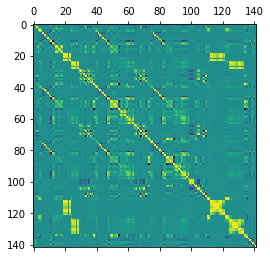

In [69]:
#try correlation matrix
plt.matshow(train_c.corr())
corr_df = train_c.corr()
corr_df

In [71]:
corr_csv = corr_df.to_csv("DoraS⁩\⁨Users\⁨DoraB⁩\⁨Dropbox⁩\⁨Data_Science_and_Visualization_Bootcamp⁩\⁨FInalProject⁩")

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = train_c.corr()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [ ]:
#pd.scatter_matrix(train_c, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [ ]:
#pd.plotting.scatter_matrix(train_c, alpha = 0.3, figsize = (14,8), diagonal = 'kde')